## Climate data visualization and computation

This Notebook allows you to create graph about some climdex parameters with a historical average values.

In [1]:
#### Useful librairies
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import numpy as np

#### Functions
def PlotLineGraph(x_values: list[int] | list[float] | list[str],
                     y_values: list[int] | list[float] | list[str], 
                     colorline: str,
                     color_font: str,
                     marker: str,
                     linestyle: str,
                     label: str,
                     shift_y: float | int = 0.6,
                     display_values: bool = False) -> None:

    """ This function allows you to plot a graphic for a desire parameter
        such as the temperature with the values of the data.
        We can choose the color of the plot, the linestyle, the color of font
        to display values (if the arg display_value == True),

        For more information about 'matplotlib.annotate':
        https://matplotlib.org/stable/users/explain/text/annotations.html

        For more information about the values for 'marker':
        https://matplotlib.org/stable/api/markers_api.html

        For more information about the values for 'linestyle':
        https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D.set_linestyle
        (check at 'set_linestyle')

        For more information about the values for 'color':
        https://matplotlib.org/stable/gallery/color/named_colors.html

        Args:
            x_values [list[int] or list[float] | list[str]]
                -> list with the data to plot on x axis

            y_values [list[int] or list[float] | list[str]]
                -> list with the data to plot on y axis

            colorline [str]
                -> the color of the plot for the data

            color_font [str]
                -> the color of the plot for the data
            
            linestyle [str]
                -> the style of the line for the plot

            label [str]
                -> the label for the corresponding data

            shift_y [str]
                -> shift the values we want to display a little
                   bit up or down (compare to the value) so it is
                   more clear

            display_values [bool, default value: True]
                -> can display the values for each point
    """

    plt.plot(x_values, y_values, color=colorline, marker=marker, linestyle=linestyle, label=label)
    if display_values is True:
        for x, y in zip(x_values, y_values):
            plt.annotate(text=str(y)[:5], xy=(x, y+shift_y), color=color_font)

#### Prepare data 

The data of temperature and precipitation come from [InfoClimat](https://www.infoclimat.fr/climatologie-mensuelle/48455/mai/2024/bangkok.html)

In [3]:
#### Data (tp + RR)
## Select the year of the data
year = 2024
months = ['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug', 'Sept'] #, 'Oct', 'Nov', 'Dec']
time = pd.date_range(f"{year}-01-01", f"{year}-12-31", freq='ME')

## Historical average data
TNM_histo = [23.3, 24.8, 26.3, 27.2, 26.9, 26.4, 26.1, 25.9, 25.4] #, 25.1, 24.7, 23.1]
TXM_histo = [32.7, 33.7, 34.7, 35.8, 35.1, 34.1, 33.5, 33.3, 33.2] #, 33, 33.1, 32.3]
RR_histo  = (19, 22, 52, 104, 245, 190, 199, 230, 339) #, 275, 56, 7)

# 2024
TNM_2024 = [25.8, 27, 28.2, 29.7, 28.3, 28, 26.6, 26.8, 26.3]
TXM_2024 = [34.6, 35, 35.5, 37.5, 36.3, 35.1, 33.4, 34.9, 33.9]

RR_2024 = (0, 42.4, 59.9, 0.3, 286.3, 81.6, 184, 257, 294)

After we selected the year, the data and set the values, we can now plot the result. 
 
- The first graph is a plot bar representing the monthly amont of rainfall during a year at Bangkok (Thailand). I diplay the historical data (grey) and the data of the year (blue).

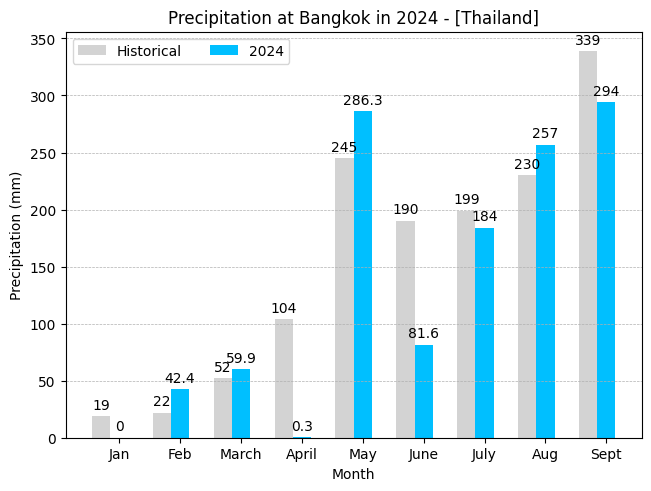

In [4]:
dict_values = {'Historical': RR_histo,
               f'{str(year)}': RR_2024}
width = 0.3  # the width of the bars
color = ['lightgrey', 'deepskyblue'] # color of the bars
x = np.arange(len(months))+1  # the label locations
pos = 0

fig, ax = plt.subplots(layout='constrained')

for climdex, data in dict_values.items():
    offset = width * pos
    rects = ax.bar(x+offset, data, width, label=climdex, color=color[pos])
    ax.bar_label(rects, padding=3)
    pos += 1

ax.set_xticks(x + width, months)
ax.set_xlabel('Month')
ax.set_ylabel('Precipitation (mm)')
ax.set_title(f'Precipitation at Bangkok in {year} - [Thailand]')
ax.legend(loc='upper left', ncols=2)
ax.grid(axis = 'y', linestyle='--', linewidth=0.5)

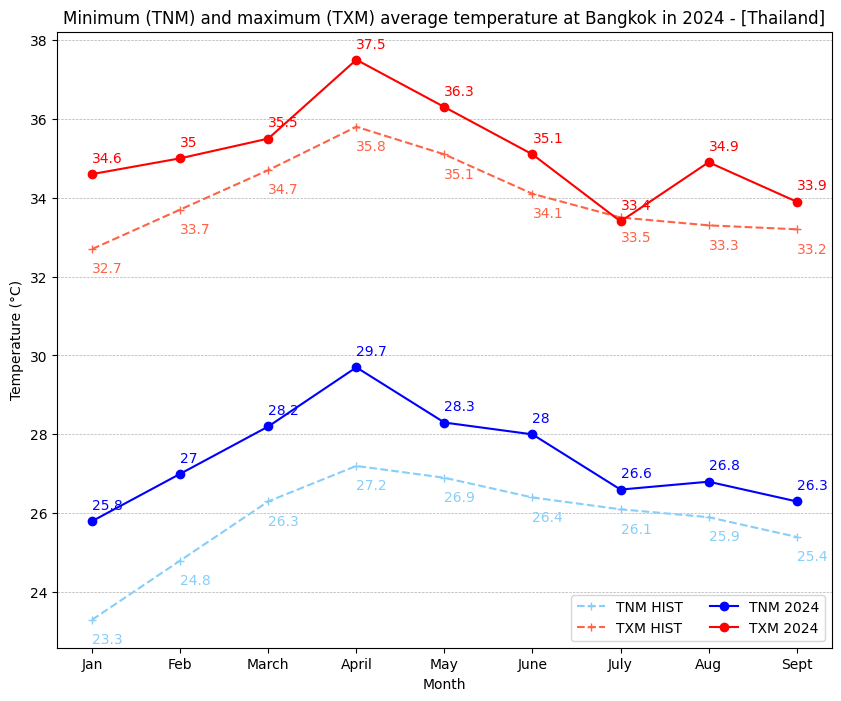

In [5]:
plt.figure(figsize=(10, 8))

PlotLineGraph(months, TNM_histo, 'lightskyblue', 'lightskyblue', '+', '--',
              label='TNM HIST', shift_y=-0.6, display_values=True)

PlotLineGraph(months, TXM_histo, 'tomato', 'tomato', '+', '--',
              label='TXM HIST', shift_y=-0.6, display_values=True)

PlotLineGraph(months, TNM_2024, 'blue', 'blue', 'o', '-',
              label=f'TNM {year}', shift_y=0.3, display_values=True)

PlotLineGraph(months, TXM_2024, 'red', 'red', 'o', '-',
              label=f'TXM {year}', shift_y=0.3, display_values=True)

plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.title(f'Minimum (TNM) and maximum (TXM) average temperature at Bangkok in {year} - [Thailand]')
plt.legend(loc='lower right', ncols=2)
plt.grid(axis = 'y', linestyle='--', linewidth=0.5)